NEW MODEL

In [1]:
# STEP 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# STEP 2: Set base directory where your image folders are
import os
base_dir = "/content/drive/MyDrive/BoneBreakDataClean"

# Confirm class folders and image counts
for cls in os.listdir(base_dir):
    print(cls, "->", len(os.listdir(os.path.join(base_dir, cls))), "images")


Impacted fracture -> 75 images
Spiral Fracture -> 74 images
Comminuted fracture -> 134 images
Fracture Dislocation -> 137 images
Oblique fracture -> 69 images
Longitudinal fracture -> 68 images
Pathological fracture -> 115 images
Hairline Fracture -> 101 images
Greenstick fracture -> 106 images
Avulsion fracture -> 109 images


In [3]:
# STEP 3: Define number of classes and class names
NUM_CLASSES = 10
class_names = [
    "Impacted fracture", "Spiral Fracture", "Comminuted fracture", "Fracture Dislocation",
    "Oblique fracture", "Longitudinal fracture", "Pathological fracture",
    "Hairline Fracture", "Greenstick fracture", "Avulsion fracture"
]


In [4]:
import tensorflow as tf

# Path to your dataset folder where each class is a subfolder
dataset_dir = "/content/drive/MyDrive/BoneBreakDataClean"

# Parameters
batch_size = 32
img_height = 256
img_width = 256
validation_split = 0.2
seed = 123

# Load training dataset (80%)
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=validation_split,
    subset="training",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

# Load validation dataset (20%)
val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=validation_split,
    subset="validation",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

# Get class names from dataset folder structure
class_names = train_ds.class_names
NUM_CLASSES = len(class_names)

print(f"Classes found: {class_names}")

# Optional: cache and prefetch for performance
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Convert datasets to numpy arrays (optional, depends on your training code)
import numpy as np

def dataset_to_numpy(ds):
    images = []
    labels = []
    for batch_images, batch_labels in ds:
        images.append(batch_images.numpy())
        labels.append(batch_labels.numpy())
    return np.concatenate(images), np.concatenate(labels)

x_train, y_train = dataset_to_numpy(train_ds)
x_val, y_val = dataset_to_numpy(val_ds)

print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_val shape: {x_val.shape}, y_val shape: {y_val.shape}")


Found 988 files belonging to 10 classes.
Using 791 files for training.
Found 988 files belonging to 10 classes.
Using 197 files for validation.
Classes found: ['Avulsion fracture', 'Comminuted fracture', 'Fracture Dislocation', 'Greenstick fracture', 'Hairline Fracture', 'Impacted fracture', 'Longitudinal fracture', 'Oblique fracture', 'Pathological fracture', 'Spiral Fracture']
x_train shape: (791, 256, 256, 3), y_train shape: (791,)
x_val shape: (197, 256, 256, 3), y_val shape: (197,)


43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 256, 256,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 256, 256,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 256, 256,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 257, 257,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 128, 128,  │      1,080 │ stem_conv_pad[0]… │
│                     │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 128, 128,  │        160 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 128, 128,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 128, 128,  │        360 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 128, 128,  │        160 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 128, 128,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 40)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 40)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 10)  │        410 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 40)  │        440 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 128, 128,  │          0 │ block1a_activati… │
│ (Multiply)          │ 40)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 128, 128,  │        960 │ block1a_se_excit

 Total params: 11,315,857 (43.17 MB)

 Trainable params: 532,322 (2.03 MB)

 Non-trainable params: 10,783,535 (41.14 MB)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.1010 - loss: 2.3715 - val_accuracy: 0.1929 - val_loss: 2.2380
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 116ms/step - accuracy: 0.1842 - loss: 2.2511 - val_accuracy: 0.2081 - val_loss: 2.2053
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.1683 - loss: 2.2283 - val_accuracy: 0.2487 - val_loss: 2.1731
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.1777 - loss: 2.1999 - val_accuracy: 0.2944 - val_loss: 2.1497
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.2335 - loss: 2.1443 - val_accuracy: 0.3401 - val_loss: 2.1257
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.2624 - loss: 2.1195 - val_accuracy: 0.3198 - val_loss: 2.1047
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.2397 - loss: 2.0975 - val_accuracy: 0.3350 - val_loss: 2.0859
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.2818 - loss: 2.0604 - val_accur

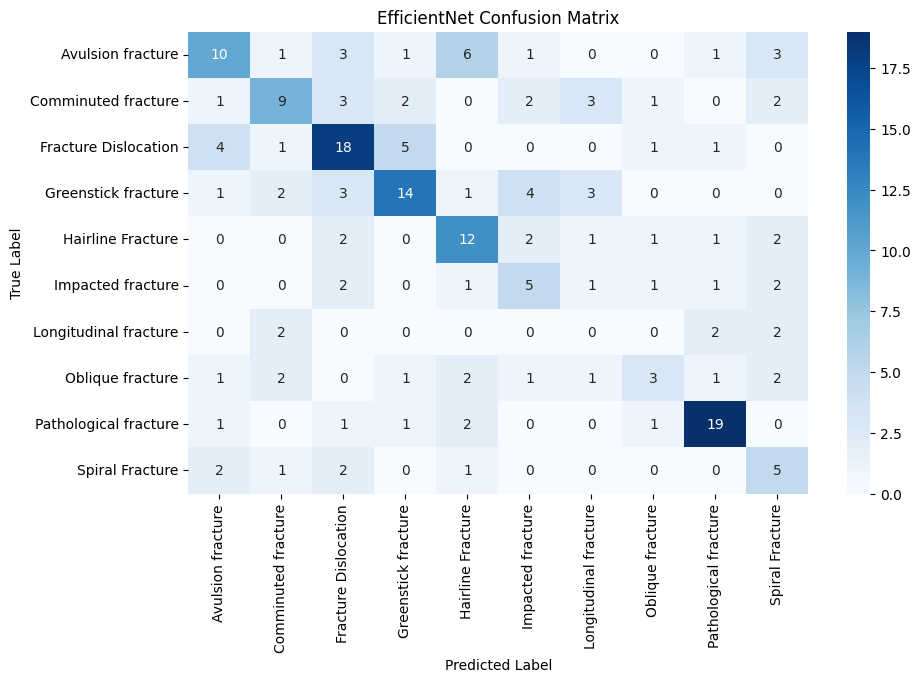

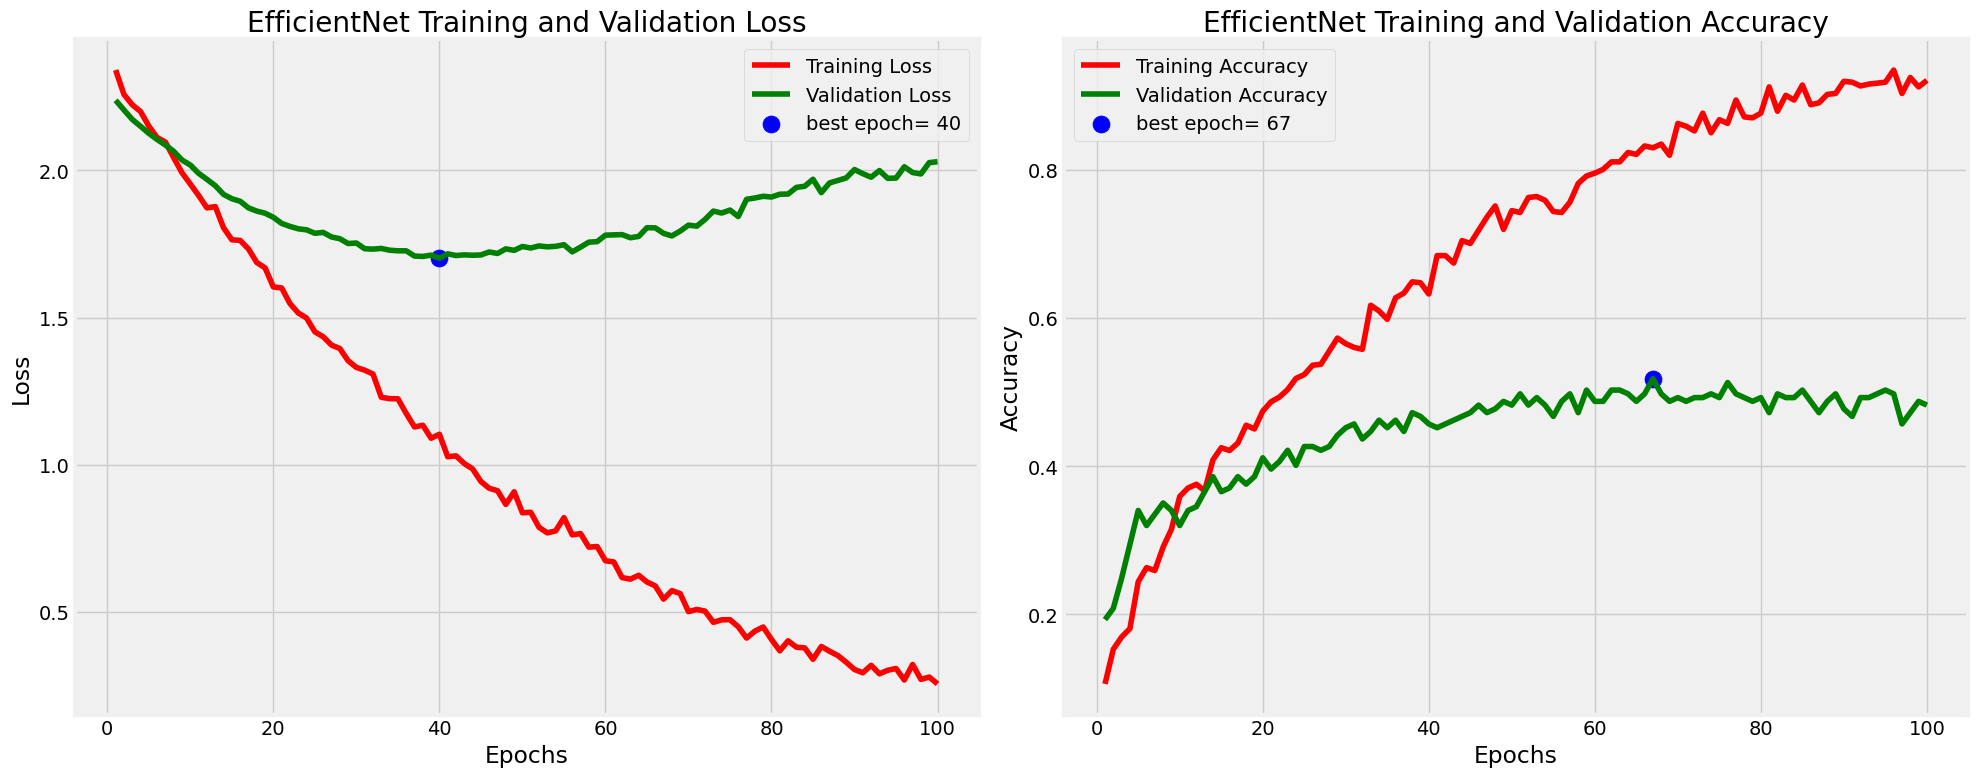

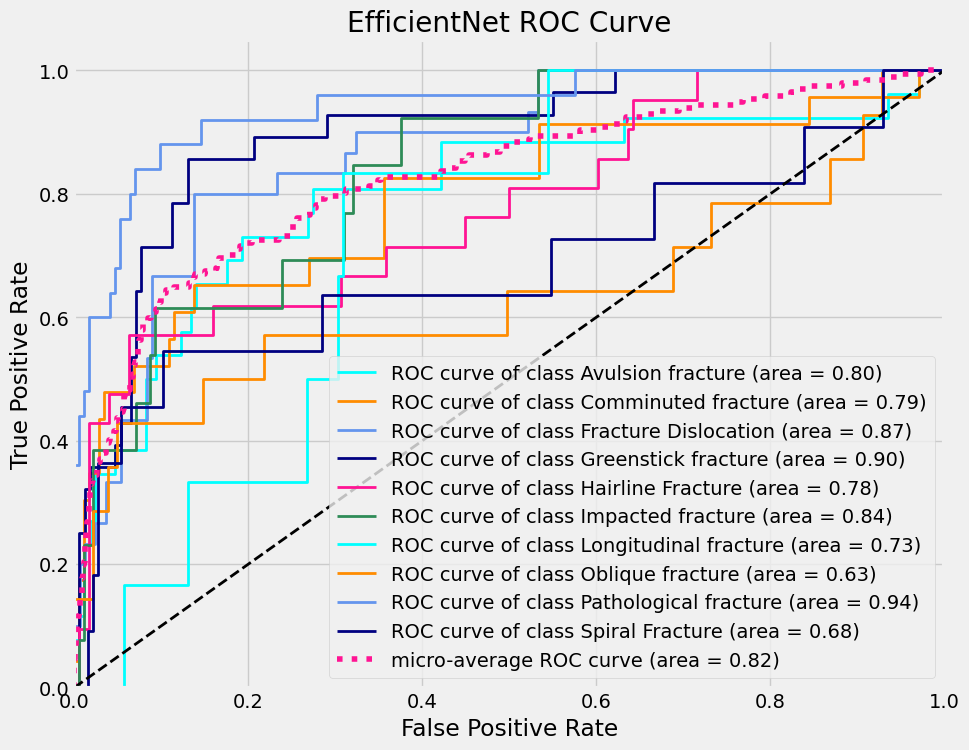

In [5]:
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras import layers, models, optimizers
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

# Build EfficientNetB3 model
input_efficient = layers.Input(shape=(256, 256, 3))
base_efficient = EfficientNetB3(weights='imagenet', include_top=False, input_tensor=input_efficient)
base_efficient.trainable = False

x_eff = layers.GlobalAveragePooling2D()(base_efficient.output)
x_eff = layers.Dense(256, activation='relu')(x_eff)
x_eff = layers.Dropout(0.5)(x_eff)
x_eff = layers.Dense(520, activation='relu')(x_eff)
x_eff = layers.Dropout(0.3)(x_eff)
output_efficient = layers.Dense(NUM_CLASSES, activation='softmax')(x_eff)

model_efficient = models.Model(inputs=input_efficient, outputs=output_efficient)
model_efficient.summary()

# Compile EfficientNet model
opt_efficient = optimizers.RMSprop(learning_rate=0.0001)
model_efficient.compile(optimizer=opt_efficient, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train
history_efficient = model_efficient.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=100,
    validation_data=(x_val, y_val),
    shuffle=True
)

# Evaluate
eval_efficient = model_efficient.evaluate(x_val, y_val)
print("Evaluation (EfficientNet):", eval_efficient)

# Get last conv layer name
for layer in model_efficient.layers:
    if 'conv' in layer.name:
        last_conv_layer_efficient = layer.name

print("Last conv layer (EfficientNet):", last_conv_layer_efficient)

# Predictions
y_pred_probs_efficient = model_efficient.predict(x_val)
y_pred_classes_efficient = np.argmax(y_pred_probs_efficient, axis=1)
y_true_classes_efficient = y_val

# Metrics
acc_efficient = accuracy_score(y_true_classes_efficient, y_pred_classes_efficient)
prec_efficient = precision_score(y_true_classes_efficient, y_pred_classes_efficient, average='weighted')
rec_efficient = recall_score(y_true_classes_efficient, y_pred_classes_efficient, average='weighted')
f1_efficient = f1_score(y_true_classes_efficient, y_pred_classes_efficient, average='weighted')
bal_acc_efficient = balanced_accuracy_score(y_true_classes_efficient, y_pred_classes_efficient)

print(f"\nAccuracy          : {acc_efficient:.4f}")
print(f"Precision         : {prec_efficient:.4f}")
print(f"Recall            : {rec_efficient:.4f}")
print(f"F1 Score          : {f1_efficient:.4f}")
print(f"Balanced Accuracy : {bal_acc_efficient:.4f}")

print("\nClassification Report (EfficientNet):")
print(classification_report(y_true_classes_efficient, y_pred_classes_efficient, target_names=class_names))

# Confusion matrix
cm_efficient = confusion_matrix(y_true_classes_efficient, y_pred_classes_efficient)

plt.figure(figsize=(10, 6))
sns.heatmap(cm_efficient, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("EfficientNet Confusion Matrix")
plt.show()

# Plot training/validation loss and accuracy
tr_acc_efficient = history_efficient.history['accuracy']
tr_loss_efficient = history_efficient.history['loss']
val_acc_efficient = history_efficient.history['val_accuracy']
val_loss_efficient = history_efficient.history['val_loss']

index_loss_efficient = np.argmin(val_loss_efficient)
val_lowest_efficient = val_loss_efficient[index_loss_efficient]
index_acc_efficient = np.argmax(val_acc_efficient)
acc_highest_efficient = val_acc_efficient[index_acc_efficient]
epochs_efficient = [i+1 for i in range(len(tr_acc_efficient))]

loss_label_eff = f'best epoch= {str(index_loss_efficient + 1)}'
acc_label_eff = f'best epoch= {str(index_acc_efficient + 1)}'

plt.figure(figsize=(20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(epochs_efficient, tr_loss_efficient, 'r', label='Training Loss')
plt.plot(epochs_efficient, val_loss_efficient, 'g', label='Validation Loss')
plt.scatter(index_loss_efficient + 1, val_lowest_efficient, s=150, c='blue', label=loss_label_eff)
plt.title('EfficientNet Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_efficient, tr_acc_efficient, 'r', label='Training Accuracy')
plt.plot(epochs_efficient, val_acc_efficient, 'g', label='Validation Accuracy')
plt.scatter(index_acc_efficient + 1, acc_highest_efficient, s=150, c='blue', label=acc_label_eff)
plt.title('EfficientNet Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# ROC Curve
n_classes_efficient = len(class_names)
y_true_bin_efficient = label_binarize(y_true_classes_efficient, classes=range(n_classes_efficient))

fpr_eff = dict()
tpr_eff = dict()
roc_auc_eff = dict()

for i in range(n_classes_efficient):
    fpr_eff[i], tpr_eff[i], _ = roc_curve(y_true_bin_efficient[:, i], y_pred_probs_efficient[:, i])
    roc_auc_eff[i] = auc(fpr_eff[i], tpr_eff[i])

fpr_eff["micro"], tpr_eff["micro"], _ = roc_curve(y_true_bin_efficient.ravel(), y_pred_probs_efficient.ravel())
roc_auc_eff["micro"] = auc(fpr_eff["micro"], tpr_eff["micro"])

plt.figure(figsize=(10, 8))
colors = itertools.cycle(['aqua', 'darkorange', 'cornflowerblue', 'navy', 'deeppink', 'seagreen'])

for i, color in zip(range(n_classes_efficient), colors):
    plt.plot(fpr_eff[i], tpr_eff[i], color=color, lw=2,
             label=f'ROC curve of class {class_names[i]} (area = {roc_auc_eff[i]:0.2f})')

plt.plot(fpr_eff["micro"], tpr_eff["micro"],
         label=f'micro-average ROC curve (area = {roc_auc_eff["micro"]:0.2f})',
         color='deeppink', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('EfficientNet ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [6]:
import tensorflow as tf

# Load dataset
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    base_dir,
    labels='inferred',
    label_mode='int',  # change to 'categorical' if you need one-hot encoding
    image_size=(256, 256),
    batch_size=32,
    shuffle=True
)

# Optional: see class names
class_names = train_data.class_names
print("Class names:", class_names)



Found 988 files belonging to 10 classes.
Class names: ['Avulsion fracture', 'Comminuted fracture', 'Fracture Dislocation', 'Greenstick fracture', 'Hairline Fracture', 'Impacted fracture', 'Longitudinal fracture', 'Oblique fracture', 'Pathological fracture', 'Spiral Fracture']


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


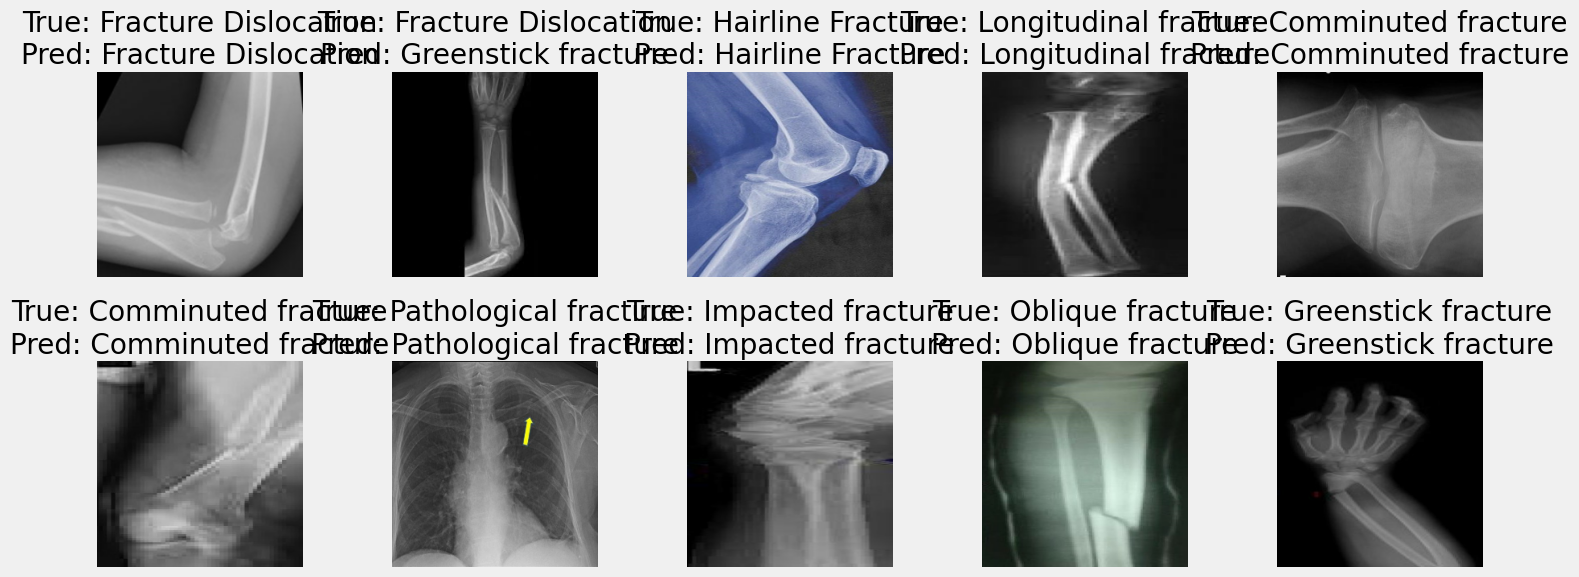


True vs Predicted Labels:
Image 0: True = Fracture Dislocation  |  Predicted = Fracture Dislocation
Image 1: True = Fracture Dislocation  |  Predicted = Greenstick fracture
Image 2: True = Hairline Fracture  |  Predicted = Hairline Fracture
Image 3: True = Longitudinal fracture  |  Predicted = Longitudinal fracture
Image 4: True = Comminuted fracture  |  Predicted = Comminuted fracture
Image 5: True = Comminuted fracture  |  Predicted = Comminuted fracture
Image 6: True = Pathological fracture  |  Predicted = Pathological fracture
Image 7: True = Impacted fracture  |  Predicted = Impacted fracture
Image 8: True = Oblique fracture  |  Predicted = Oblique fracture
Image 9: True = Greenstick fracture  |  Predicted = Greenstick fracture


In [7]:
import matplotlib.pyplot as plt
import numpy as np

num_samples = 10

# Gather samples
images = []
labels = []

for image_batch, label_batch in train_data.shuffle(1000).take(10):
    images.append(image_batch.numpy())
    labels.append(label_batch.numpy())
    if sum(len(img) for img in images) >= num_samples:
        break

images = np.concatenate(images, axis=0)[:num_samples]
labels = np.concatenate(labels, axis=0)[:num_samples]

# Get predictions
predictions = model_efficient.predict(images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = labels  # assuming labels are integer class indices

# Display images with true and predicted labels
plt.figure(figsize=(15, 6))
for i in range(num_samples):
    plt.subplot(2, 5, i + 1)
    img = images[i]
    # Convert normalized image back to uint8 if needed
    if img.max() <= 1.0:
        img_disp = (img * 255).astype(np.uint8)
    else:
        img_disp = img.astype(np.uint8)

    plt.imshow(img_disp)
    plt.title(f"True: {class_names[true_classes[i]]}\nPred: {class_names[predicted_classes[i]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Also print the true vs predicted in console
print("\nTrue vs Predicted Labels:")
for i in range(num_samples):
    print(f"Image {i}: True = {class_names[true_classes[i]]}  |  Predicted = {class_names[predicted_classes[i]]}")


In [4]:
# app.py
from fastapi import FastAPI, File, UploadFile
from fastapi.middleware.cors import CORSMiddleware
from PIL import Image
import io

app = FastAPI()

# Allow Firebase frontend to talk to it
app.add_middleware(
    CORSMiddleware,
    allow_origins=["*"],  # Use specific Firebase URL in production
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)

def your_model_analysis_function(image):
    # Replace this with your real model logic
    return "This looks like a distal radius fracture."

@app.post("/analyze")
async def analyze(file: UploadFile = File(...)):
    contents = await file.read()
    image = Image.open(io.BytesIO(contents))
    result = your_model_analysis_function(image)
    return {"result": result}


In [6]:
# Cell in Google Colab to generate requirements.txt
with open("requirements.txt", "w") as f:
    f.write("""
fastapi
uvicorn
pillow
# Add other libraries below if needed
torch
numpy
scikit-learn
""")


In [7]:
from google.colab import files
files.download("requirements.txt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
pip install -r requirements.txt


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
